In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [7]:
train_X=np.linspace(-1,1,100)
train_Y = 2*train_X+np.random.randn(*train_X.shape)*0.3

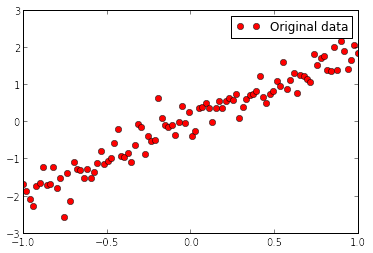

In [8]:
plt.plot(train_X,train_Y,'ro',label='Original data')
plt.legend()
plt.show()

In [9]:
#模型
X=tf.placeholder('float')
Y=tf.placeholder('float')
W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.zeros([1]),name='bias')
z=tf.multiply(X,W)+b


In [10]:
#反向优化
cost=tf.reduce_mean(tf.square(Y-z))
learning_rate=0.01
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epoch 1 cost 0.354204 w [ 1.2371856] b [ 0.2007484]
epoch 3 cost 0.128675 w [ 1.77198172] b [ 0.05573925]
epoch 5 cost 0.10744 w [ 1.91681361] b [ 0.00117396]
epoch 7 cost 0.105231 w [ 1.95437324] b [-0.01322226]
epoch 9 cost 0.104884 w [ 1.96408617] b [-0.0169494]
epoch 11 cost 0.104809 w [ 1.96659875] b [-0.01791344]
epoch 13 cost 0.10479 w [ 1.96724772] b [-0.01816245]
epoch 15 cost 0.104786 w [ 1.96741521] b [-0.01822678]
epoch 17 cost 0.104785 w [ 1.96745861] b [-0.01824348]
epoch 19 cost 0.104784 w [ 1.96746981] b [-0.01824777]
finished!
cost= 0.104784 w= [ 1.9674722] b= [-0.01824859]


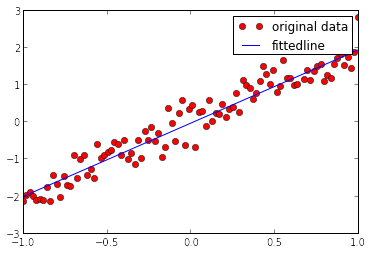

x=0.2,z= [ 0.37524587]


In [29]:
#xunlian
init = tf.global_variables_initializer()
traning_apochs = 20
display_step=2

with tf.Session() as sess:
    sess.run(init)
    plotdata={
        'batchsize':[],
        'loss':[],
    }
    for epoch in range(traning_apochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if epoch % display_step == 0:
            loss=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print 'epoch',epoch+1,'cost',loss,'w',sess.run(W),'b',sess.run(b)
    print "finished!"
    print'cost=',sess.run(cost,feed_dict={X:train_X,Y:train_Y}),'w=',sess.run(W),'b=',sess.run(b)
    #
    plt.plot(train_X,train_Y,'ro',label='original data')
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='fittedline')
    plt.legend()
    plt.show()
    
    #ceshi
    print 'x=0.2,z=',sess.run(z,feed_dict={X:0.2})